In [282]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [219]:
train_data = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

In [220]:
print(train_data.shape)
train_data.head()

(8693, 14)


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [221]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [222]:
train_data.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [223]:
train_data[['CabinDeck','CabinNum','CabinSide']] = train_data['Cabin'].str.split('/', expand=True)
train_data['CabinNum'] = train_data['CabinNum'].apply(pd.to_numeric, errors='coerce')
test_data[['CabinDeck','CabinNum','CabinSide']] = test_data['Cabin'].str.split('/', expand=True)
test_data['CabinNum'] = test_data['CabinNum'].apply(pd.to_numeric, errors='coerce')

train_data[['PassengerGroup','PassengerNum']] = train_data['PassengerId'].str.split('_', expand=True)
train_data[['PassengerGroup','PassengerNum']] = train_data[['PassengerGroup','PassengerNum']].apply(pd.to_numeric, errors='coerce')
test_data[['PassengerGroup','PassengerNum']] = test_data['PassengerId'].str.split('_', expand=True)
test_data[['PassengerGroup','PassengerNum']] = test_data[['PassengerGroup','PassengerNum']].apply(pd.to_numeric, errors='coerce')

In [224]:
train_data['Bill'] = train_data['RoomService'] + train_data['FoodCourt'] + train_data['ShoppingMall'] + train_data['Spa'] + train_data['VRDeck']
test_data['Bill'] = test_data['RoomService'] + test_data['FoodCourt'] + test_data['ShoppingMall'] + test_data['Spa'] + test_data['VRDeck']

In [225]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide,PassengerGroup,PassengerNum,Bill
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0.0,P,1,1,0.0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0.0,S,2,1,736.0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0.0,S,3,1,10383.0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0.0,S,3,2,5176.0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1.0,S,4,1,1091.0


<AxesSubplot:xlabel='Destination', ylabel='Age'>

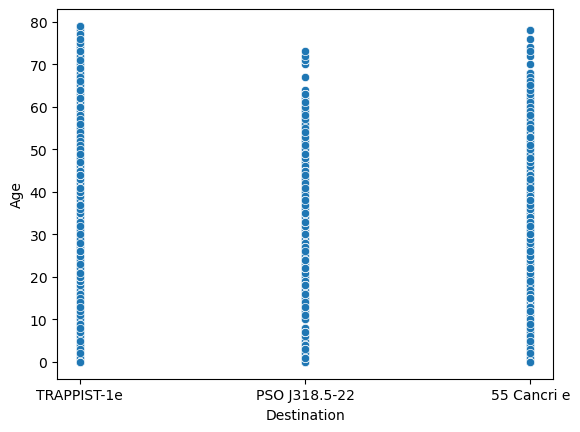

In [226]:
sns.scatterplot(data=train_data, x='Destination', y='Age')

In [227]:
# sns.pairplot(data=train_data, vars=['Age','HomePlanet','Destination','Transported'], hue='Transported')

In [228]:
train_data.CabinDeck.value_counts(dropna=False)

F      2794
G      2559
E       876
B       779
C       747
D       478
A       256
NaN     199
T         5
Name: CabinDeck, dtype: int64

In [229]:
# train_data.fillna('Missing', inplace=True)

CabinDeck     A    B    C    D    E     F     G  T
HomePlanet                                        
Earth         0    0    0    0  395  1614  2498  0
Europa      252  766  734  186  128     0     0  4
Mars          0    0    0  282  330  1110     0  0


<AxesSubplot:xlabel='HomePlanet'>

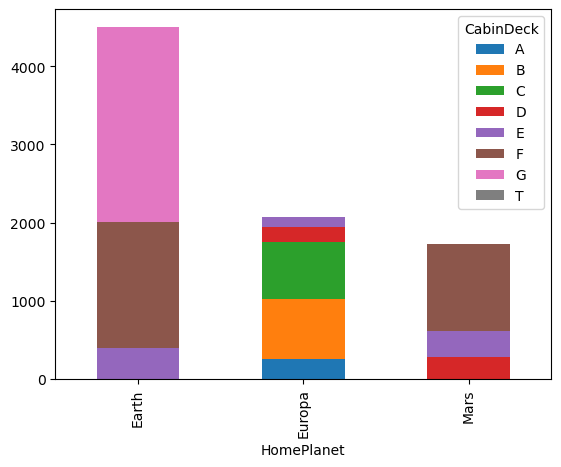

In [230]:
table_home_deck = pd.crosstab(train_data.HomePlanet, train_data.CabinDeck, dropna=False)
print(table_home_deck)
table_home_deck.plot(kind='bar', stacked=True)

In [231]:
def fill_home(row):
    home = row.HomePlanet
    
    if pd.isna(home):
        if row.CabinDeck in ['A','B','C','T']: home = 'Europa'
        if row.CabinDeck == 'G': home = 'Earth'
        return home
    else:
        return home

train_data.HomePlanet = train_data.apply(lambda row: fill_home(row), axis=1)
train_data.HomePlanet.value_counts(dropna=False)

Earth     4663
Europa    2162
Mars      1759
NaN        109
Name: HomePlanet, dtype: int64

In [232]:
# table_num_side = pd.crosstab(train_data.CabinSide, train_data.CabinNum)
# print(table_num_side)

<AxesSubplot:xlabel='CabinSide', ylabel='count'>

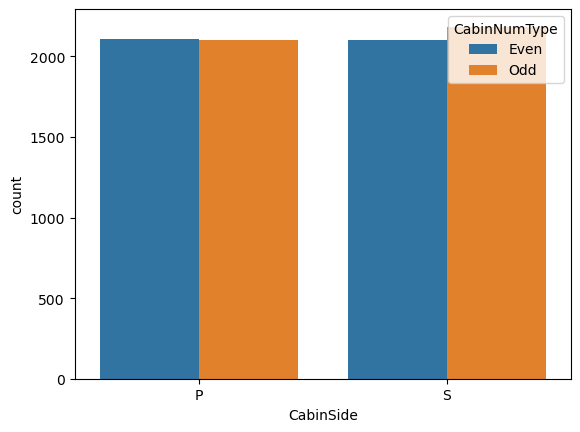

In [233]:
train_data['CabinNumType'] = train_data['CabinNum'].apply(lambda x: 'Even' if x%2 == 0 else 'Odd' if x%2 != 0 else 'Unknown')
sns.countplot(x='CabinSide', hue='CabinNumType', data=train_data)

<AxesSubplot:xlabel='CabinDeck', ylabel='count'>

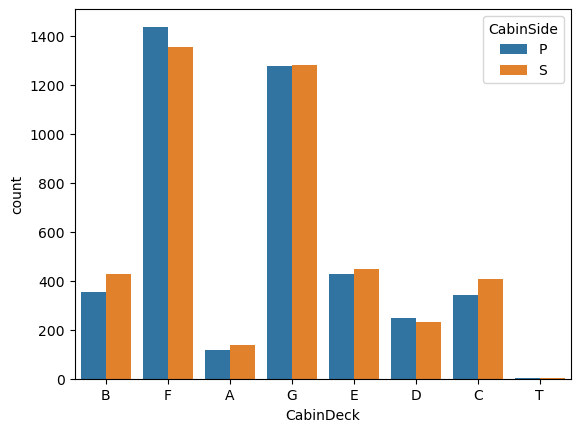

In [234]:
sns.countplot(hue='CabinSide', x='CabinDeck', data=train_data)

In [283]:
train_data[train_data.CabinDeck == 'T']

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,PassengerGroup,PassengerNum,Bill,CabinNumType,CryoSleepCode,CabinSideCode,TransportedCode,VIPCode,HomePlanetCode,DestinationCode
1004,1071_01,Europa,False,T/0/P,TRAPPIST-1e,35.0,False,415.0,1328.0,0.0,...,1071,1,1817.0,Even,0,0,0,0,1,2
2254,2414_01,Europa,False,T/1/P,TRAPPIST-1e,42.0,False,0.0,1829.0,2.0,...,2414,1,7411.0,Odd,0,0,0,0,1,2
2734,2935_01,Europa,False,T/2/P,TRAPPIST-1e,33.0,False,0.0,28.0,0.0,...,2935,1,7412.0,Even,0,0,0,0,1,2
2763,2971_01,Europa,False,T/3/P,TRAPPIST-1e,38.0,False,0.0,3135.0,0.0,...,2971,1,3164.0,Odd,0,0,1,0,1,2
4565,4863_01,Europa,NaN,T/2/S,TRAPPIST-1e,37.0,False,1721.0,667.0,0.0,...,4863,1,0.0,Even,2,1,0,0,1,2


TypeError: 'value' must be an instance of str or bytes, not a float

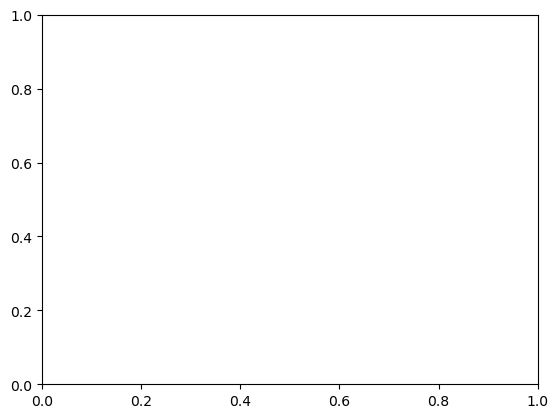

In [287]:
plt.plot(train_data.CabinNum, train_data.CabinDeck)
plt.show()

In [236]:
# sns.heatmap(table_num_side, cmap='Blues', annot=True, fmt='d')

In [237]:
train_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Bill']] = train_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Bill']].fillna(0)
test_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Bill']] = test_data.loc[:,['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Bill']].fillna(0)



In [238]:
# train_data.dropna(inplace=True)

In [239]:
train_data.isnull().sum()

PassengerId         0
HomePlanet        109
CryoSleep         217
Cabin             199
Destination       182
Age               179
VIP               203
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Name              200
Transported         0
CabinDeck         199
CabinNum          199
CabinSide         199
PassengerGroup      0
PassengerNum        0
Bill                0
CabinNumType        0
dtype: int64

In [240]:
# train_data.describe()

In [241]:
train_data[train_data.duplicated()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide,PassengerGroup,PassengerNum,Bill,CabinNumType


In [242]:
# (train_data['HomePlanet'].isna() & train_data['Destination'].isna()).sum()

<AxesSubplot:>

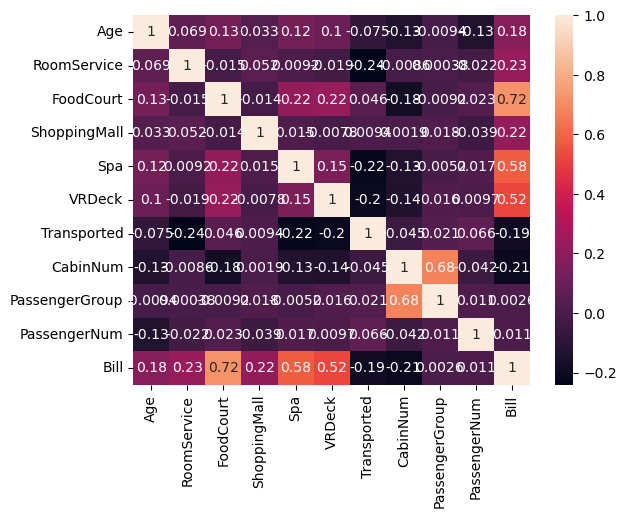

In [243]:
# plt.figure(figsize=(12,12))
sns.heatmap(data=train_data.corr(), annot=True)

In [244]:
train_data[train_data['Age'].isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,Transported,CabinDeck,CabinNum,CabinSide,PassengerGroup,PassengerNum,Bill,CabinNumType
50,0052_01,Earth,False,G/6/S,TRAPPIST-1e,NaN,False,4.0,0.0,2.0,...,0.0,Elaney Hubbarton,False,G,6.0,S,52,1,4689.0,Even
64,0068_01,Mars,False,E/4/S,TRAPPIST-1e,NaN,False,793.0,0.0,2.0,...,0.0,Cinst Binie,False,E,4.0,S,68,1,1048.0,Even
137,0149_01,Earth,True,G/27/S,55 Cancri e,NaN,False,0.0,0.0,0.0,...,0.0,Billya Hubbarrison,True,G,27.0,S,149,1,0.0,Odd
181,0202_02,Europa,False,A/2/P,55 Cancri e,NaN,False,0.0,2433.0,0.0,...,443.0,Vegas Embleng,True,A,2.0,P,202,2,0.0,Even
184,0206_01,Europa,False,C/9/S,55 Cancri e,NaN,False,2.0,1720.0,12.0,...,122.0,Nuson Brugashed,True,C,9.0,S,206,1,2981.0,Odd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,8835_01,Earth,True,G/1425/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,...,0.0,Shalle Bartines,False,G,1425.0,S,8835,1,0.0,Odd
8301,8862_03,Europa,True,C/329/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,...,0.0,Alchib Myling,True,C,329.0,S,8862,3,0.0,Odd
8374,8956_04,Earth,False,G/1453/P,TRAPPIST-1e,NaN,False,194.0,1.0,10.0,...,0.0,Krisa Bonnondry,False,G,1453.0,P,8956,4,834.0,Odd
8407,8988_01,Earth,True,G/1448/S,TRAPPIST-1e,NaN,False,0.0,0.0,0.0,...,0.0,Maen Fowlesterez,True,G,1448.0,S,8988,1,0.0,Even


In [245]:
train_data['HomePlanet'].value_counts()

Earth     4663
Europa    2162
Mars      1759
Name: HomePlanet, dtype: int64

<BarContainer object of 3 artists>

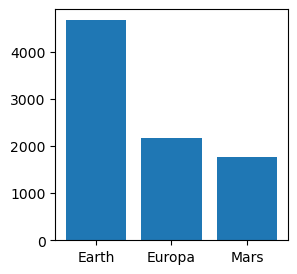

In [246]:
plt.figure(figsize=(3,3))
# fig, ax = plt.subplots(figsize=(3,4))
plt.bar(train_data['HomePlanet'].value_counts().index, train_data['HomePlanet'].value_counts().values)

<AxesSubplot:xlabel='Destination', ylabel='Count'>

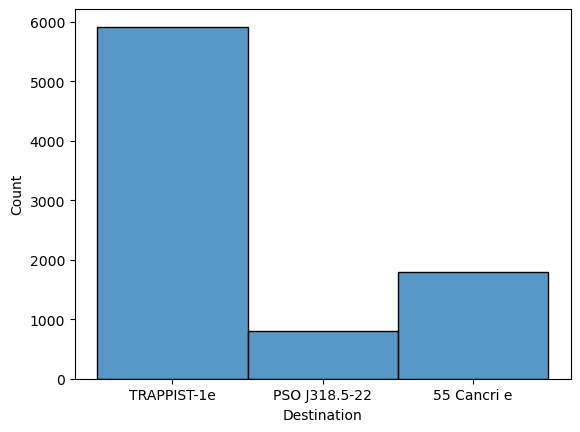

In [247]:
# sns.set_style(rc=)
sns.histplot(data=train_data, x='Destination')
# plt.show()

In [279]:
le = LabelEncoder()
train_data['HomePlanetCode'] = le.fit_transform(train_data['HomePlanet'])
train_data['DestinationCode'] = le.fit_transform(train_data['Destination'])
test_data['HomePlanetCode'] = le.fit_transform(test_data['HomePlanet'])
test_data['DestinationCode'] = le.fit_transform(test_data['Destination'])

In [280]:
train_data['HomePlanetCode'].value_counts()

0    4663
1    2162
2    1759
3     109
Name: HomePlanetCode, dtype: int64

In [250]:
# train_data['DestinationCode'].value_counts()

In [251]:
train_data[train_data['HomePlanet'].isna()].loc[:,['HomePlanet','Destination','Transported']]

,HomePlanet,Destination,Transported
59,NaN,TRAPPIST-1e,True
186,NaN,55 Cancri e,True
225,NaN,TRAPPIST-1e,False
291,NaN,TRAPPIST-1e,False
365,NaN,55 Cancri e,True
...,...,...,...
8489,NaN,TRAPPIST-1e,True
8515,NaN,TRAPPIST-1e,False
8613,NaN,55 Cancri e,False
8666,NaN,55 Cancri e,True


In [252]:
train_data[train_data['Destination'].isna()].loc[:,['HomePlanet','Destination','Transported']]

,HomePlanet,Destination,Transported
47,Mars,NaN,True
128,Earth,NaN,False
139,Earth,NaN,False
347,Earth,NaN,False
430,Earth,NaN,False
...,...,...,...
8372,Earth,NaN,True
8551,Mars,NaN,True
8616,Mars,NaN,True
8621,Europa,NaN,False


In [253]:
train_data['CryoSleepCode'] = le.fit_transform(train_data['CryoSleep'])
test_data['CryoSleepCode'] = le.fit_transform(test_data['CryoSleep'])

In [254]:
test_data.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,CabinDeck,CabinNum,CabinSide,PassengerGroup,PassengerNum,Bill,CryoSleepCode
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3.0,S,13,1,0.0,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4.0,S,18,1,2832.0,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0.0,S,19,1,0.0,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1.0,S,21,1,7418.0,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5.0,S,23,1,645.0,0
5,0027_01,Earth,False,F/7/P,TRAPPIST-1e,31.0,False,0.0,1615.0,263.0,113.0,60.0,Karlen Ricks,F,7.0,P,27,1,2051.0,0
6,0029_01,Europa,True,B/2/P,55 Cancri e,21.0,False,0.0,0.0,0.0,0.0,0.0,Aldah Ainserfle,B,2.0,P,29,1,0.0,1
7,0032_01,Europa,True,D/0/S,TRAPPIST-1e,20.0,False,0.0,0.0,0.0,0.0,0.0,Acrabi Pringry,D,0.0,S,32,1,0.0,1
8,0032_02,Europa,True,D/0/S,55 Cancri e,23.0,False,0.0,0.0,0.0,0.0,0.0,Dhena Pringry,D,0.0,S,32,2,0.0,1
9,0033_01,Earth,False,F/7/S,55 Cancri e,24.0,False,0.0,639.0,0.0,0.0,0.0,Eliana Delazarson,F,7.0,S,33,1,639.0,0


In [255]:
train_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,CabinDeck,CabinNum,CabinSide,PassengerGroup,PassengerNum,Bill,CabinNumType,CryoSleepCode
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,Maham Ofracculy,False,B,0.0,P,1,1,0.0,Even,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,Juanna Vines,True,F,0.0,S,2,1,736.0,Even,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,Altark Susent,False,A,0.0,S,3,1,10383.0,Even,0
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,Solam Susent,False,A,0.0,S,3,2,5176.0,Even,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,Willy Santantines,True,F,1.0,S,4,1,1091.0,Odd,0


In [256]:
train_data[train_data.CabinDeck.isna()]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,Transported,CabinDeck,CabinNum,CabinSide,PassengerGroup,PassengerNum,Bill,CabinNumType,CryoSleepCode
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,...,Justie Pooles,False,NaN,NaN,NaN,12,1,908.0,Odd,0
93,0101_01,Mars,True,NaN,TRAPPIST-1e,31.0,False,0.0,0.0,0.0,...,Book Trad,True,NaN,NaN,NaN,101,1,0.0,Odd,1
103,0110_01,Europa,False,NaN,TRAPPIST-1e,32.0,False,0.0,410.0,6.0,...,Graviph Aloubtled,False,NaN,NaN,NaN,110,1,5109.0,Odd,0
222,0239_01,Mars,False,NaN,TRAPPIST-1e,37.0,False,637.0,0.0,0.0,...,Diedow Resty,False,NaN,NaN,NaN,239,1,1048.0,Odd,0
227,0244_01,Mars,True,NaN,TRAPPIST-1e,43.0,False,0.0,0.0,0.0,...,Froos Sad,True,NaN,NaN,NaN,244,1,0.0,Odd,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8209,8772_02,Europa,False,NaN,55 Cancri e,53.0,False,0.0,1127.0,0.0,...,Naosura Motled,False,NaN,NaN,NaN,8772,2,0.0,Odd,0
8475,9057_01,Europa,False,NaN,55 Cancri e,36.0,True,132.0,3479.0,0.0,...,Coxan Statch,False,NaN,NaN,NaN,9057,1,7397.0,Odd,0
8485,9069_03,Europa,True,NaN,55 Cancri e,25.0,False,0.0,0.0,0.0,...,Bath Brakeng,True,NaN,NaN,NaN,9069,3,0.0,Odd,1
8509,9081_03,Earth,True,NaN,TRAPPIST-1e,1.0,False,0.0,0.0,0.0,...,Beula Clemondsey,False,NaN,NaN,NaN,9081,3,0.0,Odd,1


In [257]:
train_data['CabinDeck'].value_counts()

F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: CabinDeck, dtype: int64

In [258]:
# train_data['CabinDeckCode'] = le.fit_transform(train_data['CabinDeck'])
# test_data['CabinDeckCode'] = le.fit_transform(test_data['CabinDeck'])
# train_data['CabinDeckCode'].value_counts()

train_CabinDeck_encoded = pd.get_dummies(train_data['CabinDeck'], prefix='CabinDeck')
test_CabinDeck_encoded = pd.get_dummies(test_data['CabinDeck'], prefix='CabinDeck')

train_CabinDeck_encoded

,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T
0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0
2,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,0,0,0
8689,0,0,0,0,0,0,1,0
8690,0,0,0,0,0,0,1,0
8691,0,0,0,0,1,0,0,0


In [259]:
train_data['CabinSideCode'] = le.fit_transform(train_data['CabinSide'])
test_data['CabinSideCode'] = le.fit_transform(test_data['CabinSide'])
train_data['CabinSideCode'].value_counts()

1    4288
0    4206
2     199
Name: CabinSideCode, dtype: int64

In [260]:
train_data['TransportedCode'] = le.fit_transform(train_data['Transported'])
train_data.head()
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,VRDeck,Name,CabinDeck,CabinNum,CabinSide,PassengerGroup,PassengerNum,Bill,CryoSleepCode,CabinSideCode
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,0.0,Nelly Carsoning,G,3.0,S,13,1,0.0,1,1
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,0.0,Lerome Peckers,F,4.0,S,18,1,2832.0,0,1
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,0.0,Sabih Unhearfus,C,0.0,S,19,1,0.0,1,1
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,585.0,Meratz Caltilter,C,1.0,S,21,1,7418.0,0,1
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,0.0,Brence Harperez,F,5.0,S,23,1,645.0,0,1


In [261]:
train_data['VIPCode'] = le.fit_transform(train_data['VIP'])
test_data['VIPCode'] = le.fit_transform(test_data['VIP'])
train_data['VIPCode'].value_counts()

0    8291
2     203
1     199
Name: VIPCode, dtype: int64

In [262]:
train_data.Age.mode()[0]

24.0

In [263]:
train_data.Age.fillna(train_data.Age.mode()[0], inplace=True)
test_data.Age.fillna(test_data.Age.mode()[0], inplace=True)
train_data.Age.isna().sum()
# test_data.Age.isna().sum()


0

<AxesSubplot:>

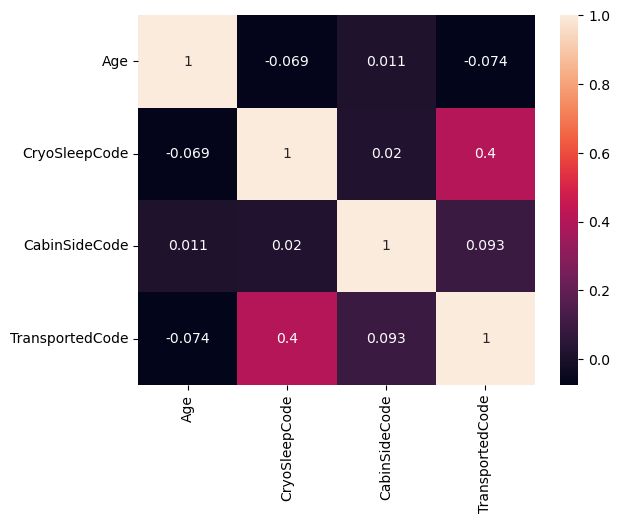

In [264]:
sns.heatmap(data=train_data[['Age','CryoSleepCode','CabinSideCode','TransportedCode']].corr(), annot=True)

<AxesSubplot:>

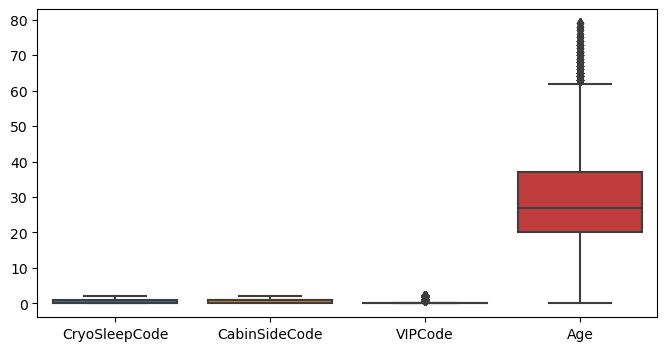

In [265]:
plt.figure(figsize=(8,4))
sns.boxplot(data=train_data[['HomePlanet','Destination','CryoSleepCode','CabinSideCode','VIPCode','Age']])

In [266]:
# sns.boxplot(data=train_data['Age'])

In [267]:
train_data['HomePlanet'].value_counts()

Earth     4663
Europa    2162
Mars      1759
Name: HomePlanet, dtype: int64

In [268]:
train_data.head()
test_data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,Name,CabinDeck,CabinNum,CabinSide,PassengerGroup,PassengerNum,Bill,CryoSleepCode,CabinSideCode,VIPCode
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,...,Nelly Carsoning,G,3.0,S,13,1,0.0,1,1,0
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,...,Lerome Peckers,F,4.0,S,18,1,2832.0,0,1,0
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,...,Sabih Unhearfus,C,0.0,S,19,1,0.0,1,1,0
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,...,Meratz Caltilter,C,1.0,S,21,1,7418.0,0,1,0
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,...,Brence Harperez,F,5.0,S,23,1,645.0,0,1,0


In [269]:
train_data.PassengerNum.value_counts()

1    6217
2    1412
3     571
4     231
5     128
6      75
7      46
8      13
Name: PassengerNum, dtype: int64

In [270]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      8693 non-null   object 
 1   HomePlanet       8584 non-null   object 
 2   CryoSleep        8476 non-null   object 
 3   Cabin            8494 non-null   object 
 4   Destination      8511 non-null   object 
 5   Age              8693 non-null   float64
 6   VIP              8490 non-null   object 
 7   RoomService      8693 non-null   float64
 8   FoodCourt        8693 non-null   float64
 9   ShoppingMall     8693 non-null   float64
 10  Spa              8693 non-null   float64
 11  VRDeck           8693 non-null   float64
 12  Name             8493 non-null   object 
 13  Transported      8693 non-null   bool   
 14  CabinDeck        8494 non-null   object 
 15  CabinNum         8494 non-null   float64
 16  CabinSide        8494 non-null   object 
 17  PassengerGroup

In [271]:
# sns.boxplot(data=train_data, x='PassengerGroup')

In [272]:
# sns.histplot(data=train_data, x='PassengerGroup')

In [273]:
# train_data.PassengerGroup.value_counts()

**Defining the feature set**

In [274]:
# features = ['HomePlanetCode','DestinationCode',
#             'CryoSleepCode',
# #             'CabinDeckCode',
#             'CabinSideCode',
#             'VIPCode',
#             'Age',
#             'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'
#            ]

# X = pd.concat([train_data[features], train_CabinDeck_encoded], axis=1)
# y = train_data['TransportedCode']

# X_test = pd.concat([test_data[features], test_CabinDeck_encoded], axis=1)

# X

In [275]:
train_data

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,...,CabinNum,CabinSide,PassengerGroup,PassengerNum,Bill,CabinNumType,CryoSleepCode,CabinSideCode,TransportedCode,VIPCode
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,...,0.0,P,1,1,0.0,Even,0,0,0,0
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,...,0.0,S,2,1,736.0,Even,0,1,1,0
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,...,0.0,S,3,1,10383.0,Even,0,1,0,1
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,...,0.0,S,3,2,5176.0,Even,0,1,0,0
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,...,1.0,S,4,1,1091.0,Odd,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,...,98.0,P,9276,1,8536.0,Even,0,0,0,1
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,...,1499.0,S,9278,1,0.0,Odd,1,1,0,0
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,...,1500.0,S,9279,1,1873.0,Even,0,1,1,0
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,...,608.0,S,9280,1,4637.0,Even,0,1,0,0


In [276]:
features = ['HomePlanet','Destination',
            'CryoSleepCode',
            'CabinDeck',
            'CabinSide',
            'VIPCode',
            'Age',
            'PassengerNum',
#             'RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'
            'Bill'
           ]

X = pd.get_dummies(train_data[features])

# X = pd.concat([train_data[features], train_CabinDeck_encoded], axis=1)
y = train_data['TransportedCode']

X_test = pd.get_dummies(test_data[features])

X_test.columns

Index(['CryoSleepCode', 'VIPCode', 'Age', 'PassengerNum', 'Bill',
       'HomePlanet_Earth', 'HomePlanet_Europa', 'HomePlanet_Mars',
       'Destination_55 Cancri e', 'Destination_PSO J318.5-22',
       'Destination_TRAPPIST-1e', 'CabinDeck_A', 'CabinDeck_B', 'CabinDeck_C',
       'CabinDeck_D', 'CabinDeck_E', 'CabinDeck_F', 'CabinDeck_G',
       'CabinDeck_T', 'CabinSide_P', 'CabinSide_S'],
      dtype='object')

In [277]:
X

,CryoSleepCode,VIPCode,Age,PassengerNum,Bill,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,...,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,CabinSide_P,CabinSide_S
0,0,0,39.0,1,0.0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,24.0,1,736.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,1,58.0,1,10383.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,33.0,2,5176.0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0,16.0,1,1091.0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,1,41.0,1,8536.0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
8689,1,0,18.0,1,0.0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
8690,0,0,26.0,1,1873.0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
8691,0,0,32.0,1,4637.0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,1


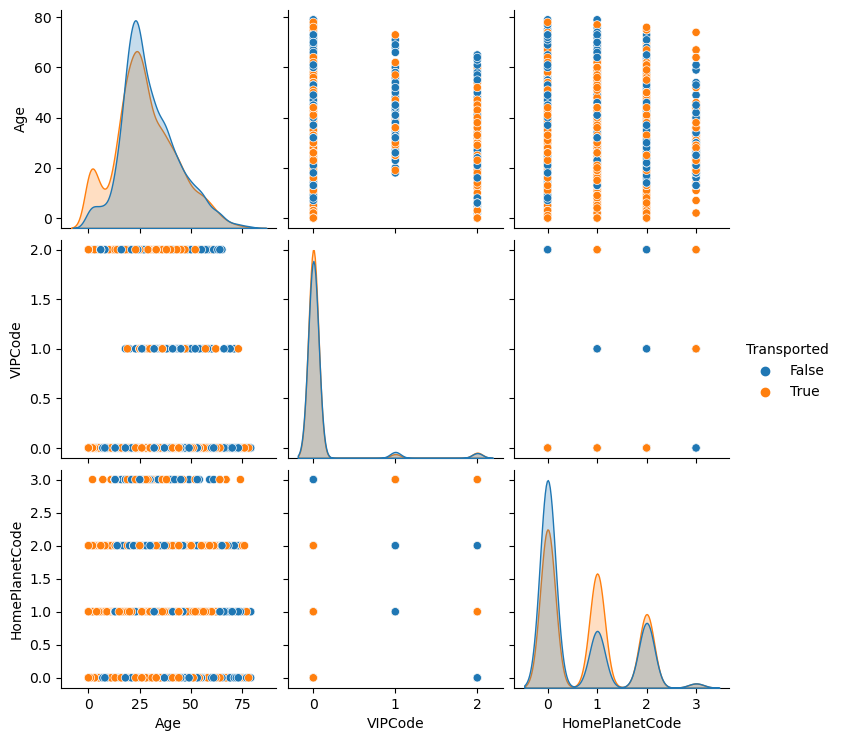

In [281]:
sns.pairplot(data=train_data, vars=['Age','VIPCode','HomePlanetCode'], hue='Transported')

In [ ]:
print(X.shape)
print(y.shape)

In [ ]:
X_test.isna().sum()

In [ ]:
y.isna().sum()

In [ ]:
y.value_counts()

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()

X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
X_test = pd.DataFrame(ss.transform(X_test), columns=X_test.columns)
X

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, random_state=42)

In [ ]:
X_train.columns

In [ ]:
# X_train_scaled = pd.DataFrame(ss.fit_transform(X_train), columns = X_train.columns)
# X_valid_scaled = pd.DataFrame(ss.transform(X_valid), columns = X_valid.columns)
# # y_train_scaled = pd.DataFrame(ss.transform(y_train), columns = y_train.columns)
# # y_valid_scaled = pd.DataFrame(ss.transform(y_valid), columns = y_valid.columns)

# X_test_scaled = pd.DataFrame(ss.transform(X_test), columns = X_test.columns)

# # X_train = X_train_scaled.copy()
# # X_valid = X_valid_scaled.copy()
# # X_test = X_test_scaled.copy()

In [ ]:
X_train

In [ ]:
# X_test_scaled.isna().sum()

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# model_rf = RandomForestClassifier(n_estimators=500, random_state=42)
# model_rf.fit(X_train_scaled, y_train)

# pred_rf_train = model_rf.predict(X_train_scaled)
# pred_rf_valid = model_rf.predict(X_valid_scaled)

# print("MAE: %.4f" % metrics.mean_absolute_error(pred_rf_train, y_train))
# print("R2 Score %.4f" % model_rf.score(X_train_scaled, y_train))

# print("MAE: %.4f" % metrics.mean_absolute_error(pred_rf_valid, y_valid))
# print("R2 Score %.4f" % model_rf.score(X_valid_scaled, y_valid))

In [ ]:
# print(metrics.classification_report(y_train, pred_rf_train))
# print(metrics.classification_report(y_valid, pred_rf_valid))

In [ ]:
# X_scaled = pd.DataFrame(mm.fit_transform(X), columns = X.columns)
# X_scaled

In [ ]:
# X_scaled.isna().sum()

**XG Boost**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [ ]:
xgb_classifier = xgb.XGBClassifier()
# xgb_classifier.fit(X_train, y_train)

params = {
    "gamma":[3],
    "learning_rate":[0.1],
    "max_depth":[6,7,8],
    "min_child_weight":[3]
         }
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=params, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)

# pred_xgb_train = xgb_classifier.predict(X_train)
# pred_xgb_valid = xgb_classifier.predict(X_valid)
pred_grid_train = grid_search.predict(X_train)
pred_grid_valid = grid_search.predict(X_valid)

print("MAE: %.4f" % metrics.mean_absolute_error(pred_grid_train, y_train))
print("R2 Score %.4f" % grid_search.score(X_train, y_train))

print("MAE: %.4f" % metrics.mean_absolute_error(pred_grid_valid, y_valid))
print("R2 Score %.4f" % grid_search.score(X_valid, y_valid))

print(metrics.classification_report(y_train, pred_grid_train))
print(metrics.classification_report(y_valid, pred_grid_valid))

In [ ]:
final_model = xgb.XGBClassifier()
final_model.fit(X_train, y_train)

pred_final_train = final_model.predict(X_train)
pred_final_valid = final_model.predict(X_valid)

print("MAE: %.4f" % metrics.mean_absolute_error(pred_final_train, y_train))
print("R2 Score %.4f" % final_model.score(X_train, y_train))

print("MAE: %.4f" % metrics.mean_absolute_error(pred_final_valid, y_valid))
print("R2 Score %.4f" % final_model.score(X_valid, y_valid))

**SVM**

In [ ]:
# from sklearn.svm import SVC
# svm = SVC()

# svm.fit(X_train_scaled, y_train)
# pred_svm_train = svm.predict(X_train_scaled)
# pred_svm_valid = svm.predict(X_valid_scaled)

# print("MAE: %.4f" % metrics.mean_absolute_error(pred_svm_train, y_train))
# print("R2 Score %.4f" % svm.score(X_train_scaled, y_train))

# print("MAE: %.4f" % metrics.mean_absolute_error(pred_svm_valid, y_valid))
# print("R2 Score %.4f" % svm.score(X_valid_scaled, y_valid))

Trying with Pipeline and Cross Validation

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer

# my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
#                               ('model', RandomForestClassifier(n_estimators=50, random_state=42))
#                              ])

# from sklearn.model_selection import cross_val_score
# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(my_pipeline, X, y, cv=5, scoring='neg_mean_absolute_error')

# print("MAE scores:\n", scores)

In [ ]:
# model_rf.fit(X_scaled,y) 
output_model = xgb.XGBClassifier(gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=3)
output_model.fit(X, y)
predictions = output_model.predict(X_test)
predictions.astype(bool)

In [ ]:
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Transported': predictions.astype(bool)})
output.to_csv('submission.csv', index = False)
print("Submission saved!")